In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
%matplotlib inline

In [2]:
df = pd.read_csv("london_crime_by_lsoa.csv")
df


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0
...,...,...,...,...,...,...,...
621830,E01002795,Islington,Criminal Damage,Criminal Damage To Motor Vehicle,0.0,2015.0,6.0
621831,E01000322,Barnet,Violence Against the Person,Harassment,0.0,2013.0,3.0
621832,E01001283,Ealing,Fraud or Forgery,Counted per Victim,0.0,2014.0,12.0
621833,E01001758,Hackney,Theft and Handling,Other Theft Person,1.0,2016.0,7.0


In [ ]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [ ]:
df.index.values

array([     0,      1,      2, ..., 121360, 121361, 121362])

In [ ]:
df.dtypes

lsoa_code          object
borough            object
major_category     object
minor_category     object
value             float64
year              float64
month             float64
dtype: object

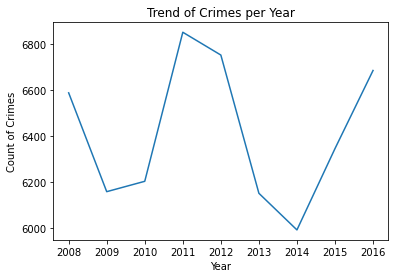

In [ ]:
df_year = df[['year', 'value']]

# Group the data by year and sum the crime counts
df_year_grouped = df_year.groupby('year').sum()

# Create a line plot of the trend of crimes over years
plt.plot(df_year_grouped.index, df_year_grouped['value'])
plt.xlabel('Year')
plt.ylabel('Count of Crimes')
plt.title('Trend of Crimes per Year')

# Add a text annotation to the plot
plt.annotate('Highest Count', xy=(2011, 6900), xytext=(2012, 6400),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

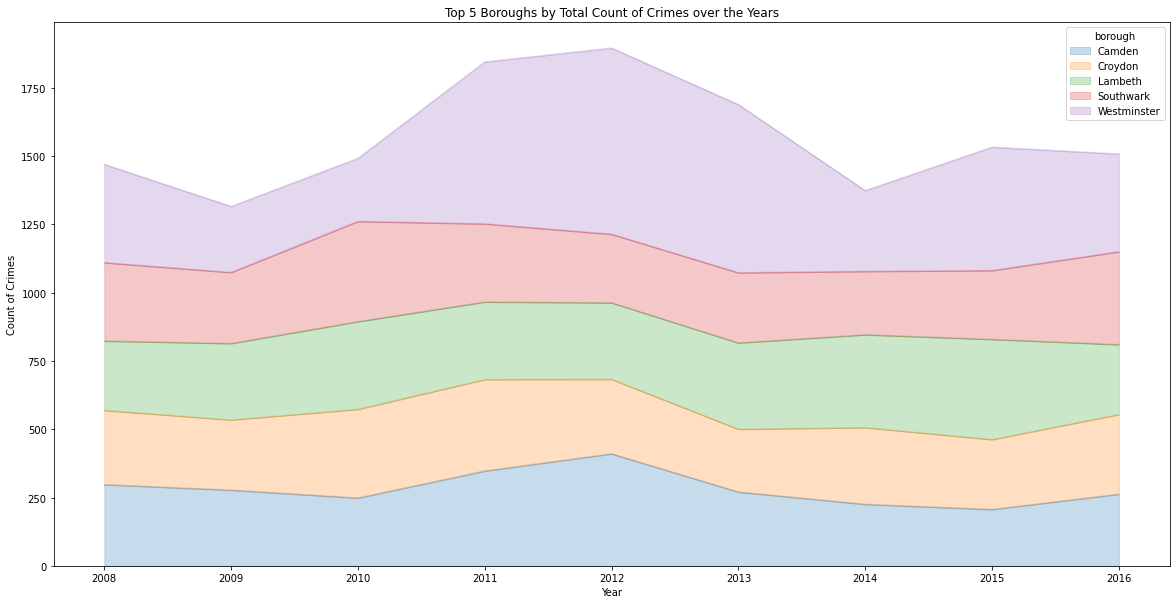

In [ ]:
top_boroughs = df.groupby('borough')['value'].sum().sort_values(ascending=False)[:5].index.tolist()

# Filter the data for the top boroughs
df_top_boroughs = df[df['borough'].isin(top_boroughs)]

# Group the data by year and borough and sum the crime counts
df_year_borough_grouped = df_top_boroughs.groupby(['year', 'borough'])['value'].sum().unstack()

# Create an area plot for each borough
df_year_borough_grouped.plot(kind='area', stacked=True, alpha=0.25,figsize=(20,10))

# Set the title and axis labels
plt.title('Top 5 Boroughs by Total Count of Crimes over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Crimes')

# Show the plot
plt.show()

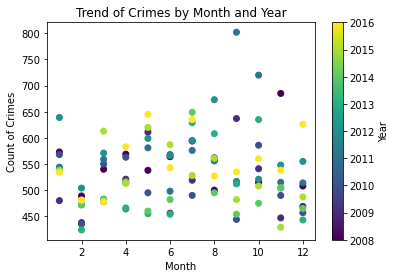

In [ ]:
df_year_month = df.groupby(['year', 'month']).sum()

# Reset the index to create separate columns for year and month
df_year_month.reset_index(inplace=True)

# Create a scatter plot of the trend of crimes over months and years
plt.scatter(df_year_month['month'], df_year_month['value'], c=df_year_month['year'], cmap='viridis')

# Set the labels and title of the plot
plt.xlabel('Month')
plt.ylabel('Count of Crimes')
plt.title('Trend of Crimes by Month and Year')

# Add a colorbar to show the mapping between color and year
cbar = plt.colorbar()
cbar.set_label('Year')

# Show the plot
plt.show()

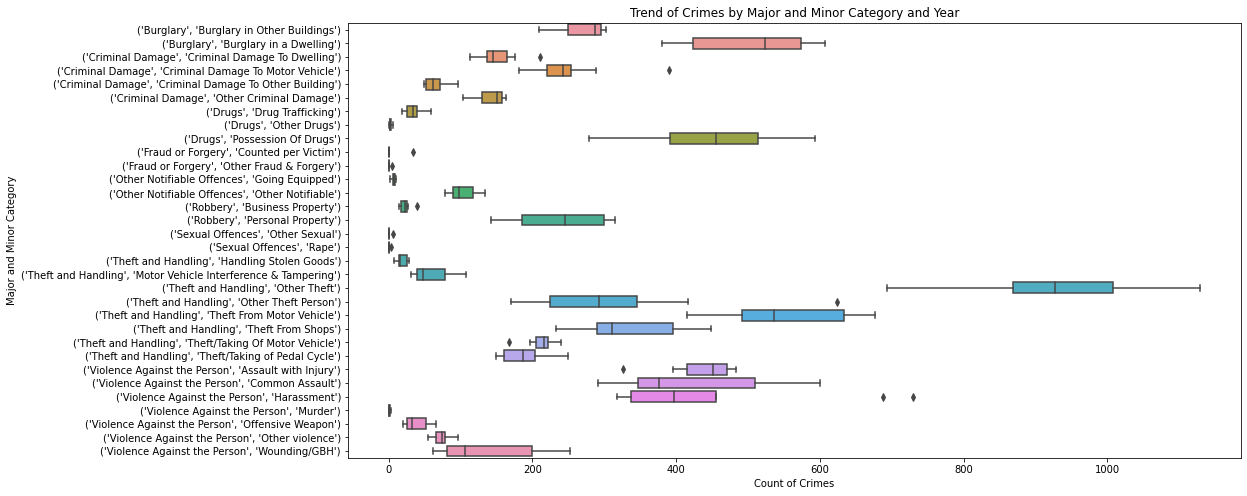

In [ ]:
import seaborn as sns
df_year_major_minor = df.groupby(['year', 'major_category', 'minor_category']).sum()['value']

# Unstack the data to create separate columns for each minor category within each major category
df_year_major_minor = df_year_major_minor.unstack(['major_category', 'minor_category'])

# Create a stacked bar plot of the trend of crimes over years by major and minor category
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_year_major_minor, orient='h')
plt.xlabel('Count of Crimes')
plt.ylabel('Major and Minor Category')
plt.title('Trend of Crimes by Major and Minor Category and Year')

# Show the plot
plt.show()

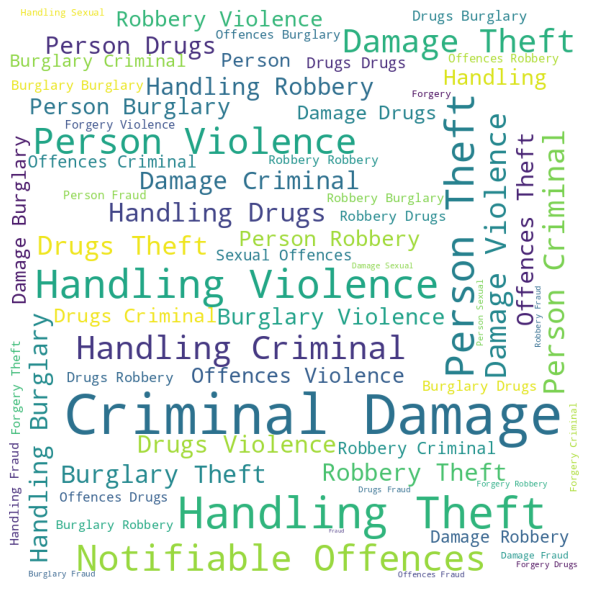

In [ ]:
from wordcloud import WordCloud
import folium
categories = df['major_category'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(categories)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60682 entries, 0 to 60681
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lsoa_code       60682 non-null  object 
 1   borough         60682 non-null  object 
 2   major_category  60682 non-null  object 
 3   minor_category  60681 non-null  object 
 4   value           60681 non-null  float64
 5   year            60681 non-null  float64
 6   month           60681 non-null  float64
dtypes: float64(3), object(4)
memory usage: 3.2+ MB


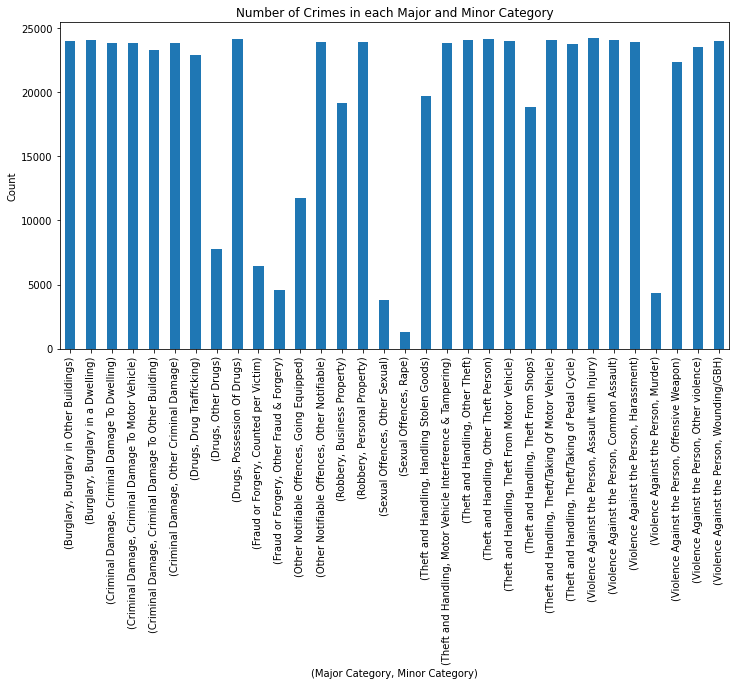

In [11]:
counts = df.groupby(['major_category', 'minor_category']).size()
counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Crimes in each Major and Minor Category')
plt.xlabel('(Major Category, Minor Category)')
plt.ylabel('Count')
plt.show()

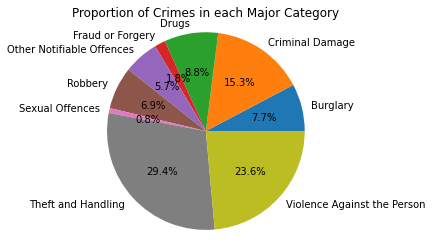

In [8]:
crime_counts = df.groupby(['year', 'major_category', 'minor_category']).size().reset_index(name='count')

# Pie chart for major categories
major_counts = crime_counts.groupby(['major_category']).sum()
plt.pie(major_counts['count'].values, labels=major_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Crimes in each Major Category')
plt.show()



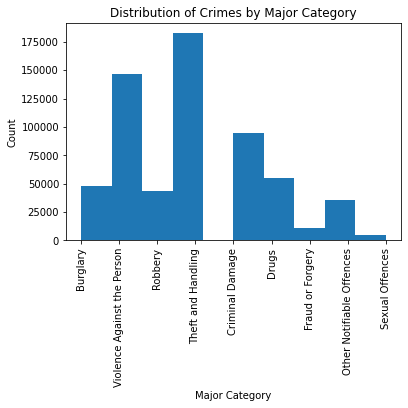

In [9]:
plt.hist(df['major_category'], bins=10)
plt.xticks(rotation=90)
plt.xlabel('Major Category')
plt.ylabel('Count')
plt.title('Distribution of Crimes by Major Category')
plt.show()

In [5]:
import folium
print("Crime rate in boroughs of london")
print("please zoom in to view the map")
df2=df[['borough','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[54.237933,-2.36967],zoom_start=5,tiles = 'OpenStreetMap')

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)

#folium.LayerControl().add_to(world_map)
world_map.save('LondonCrime.html')
display(world_map)












Crime rate in boroughs of london
please zoom in to view the map


/usr/local/lib/python3.9/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
